# Random Forest Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.dropna(inplace=True)

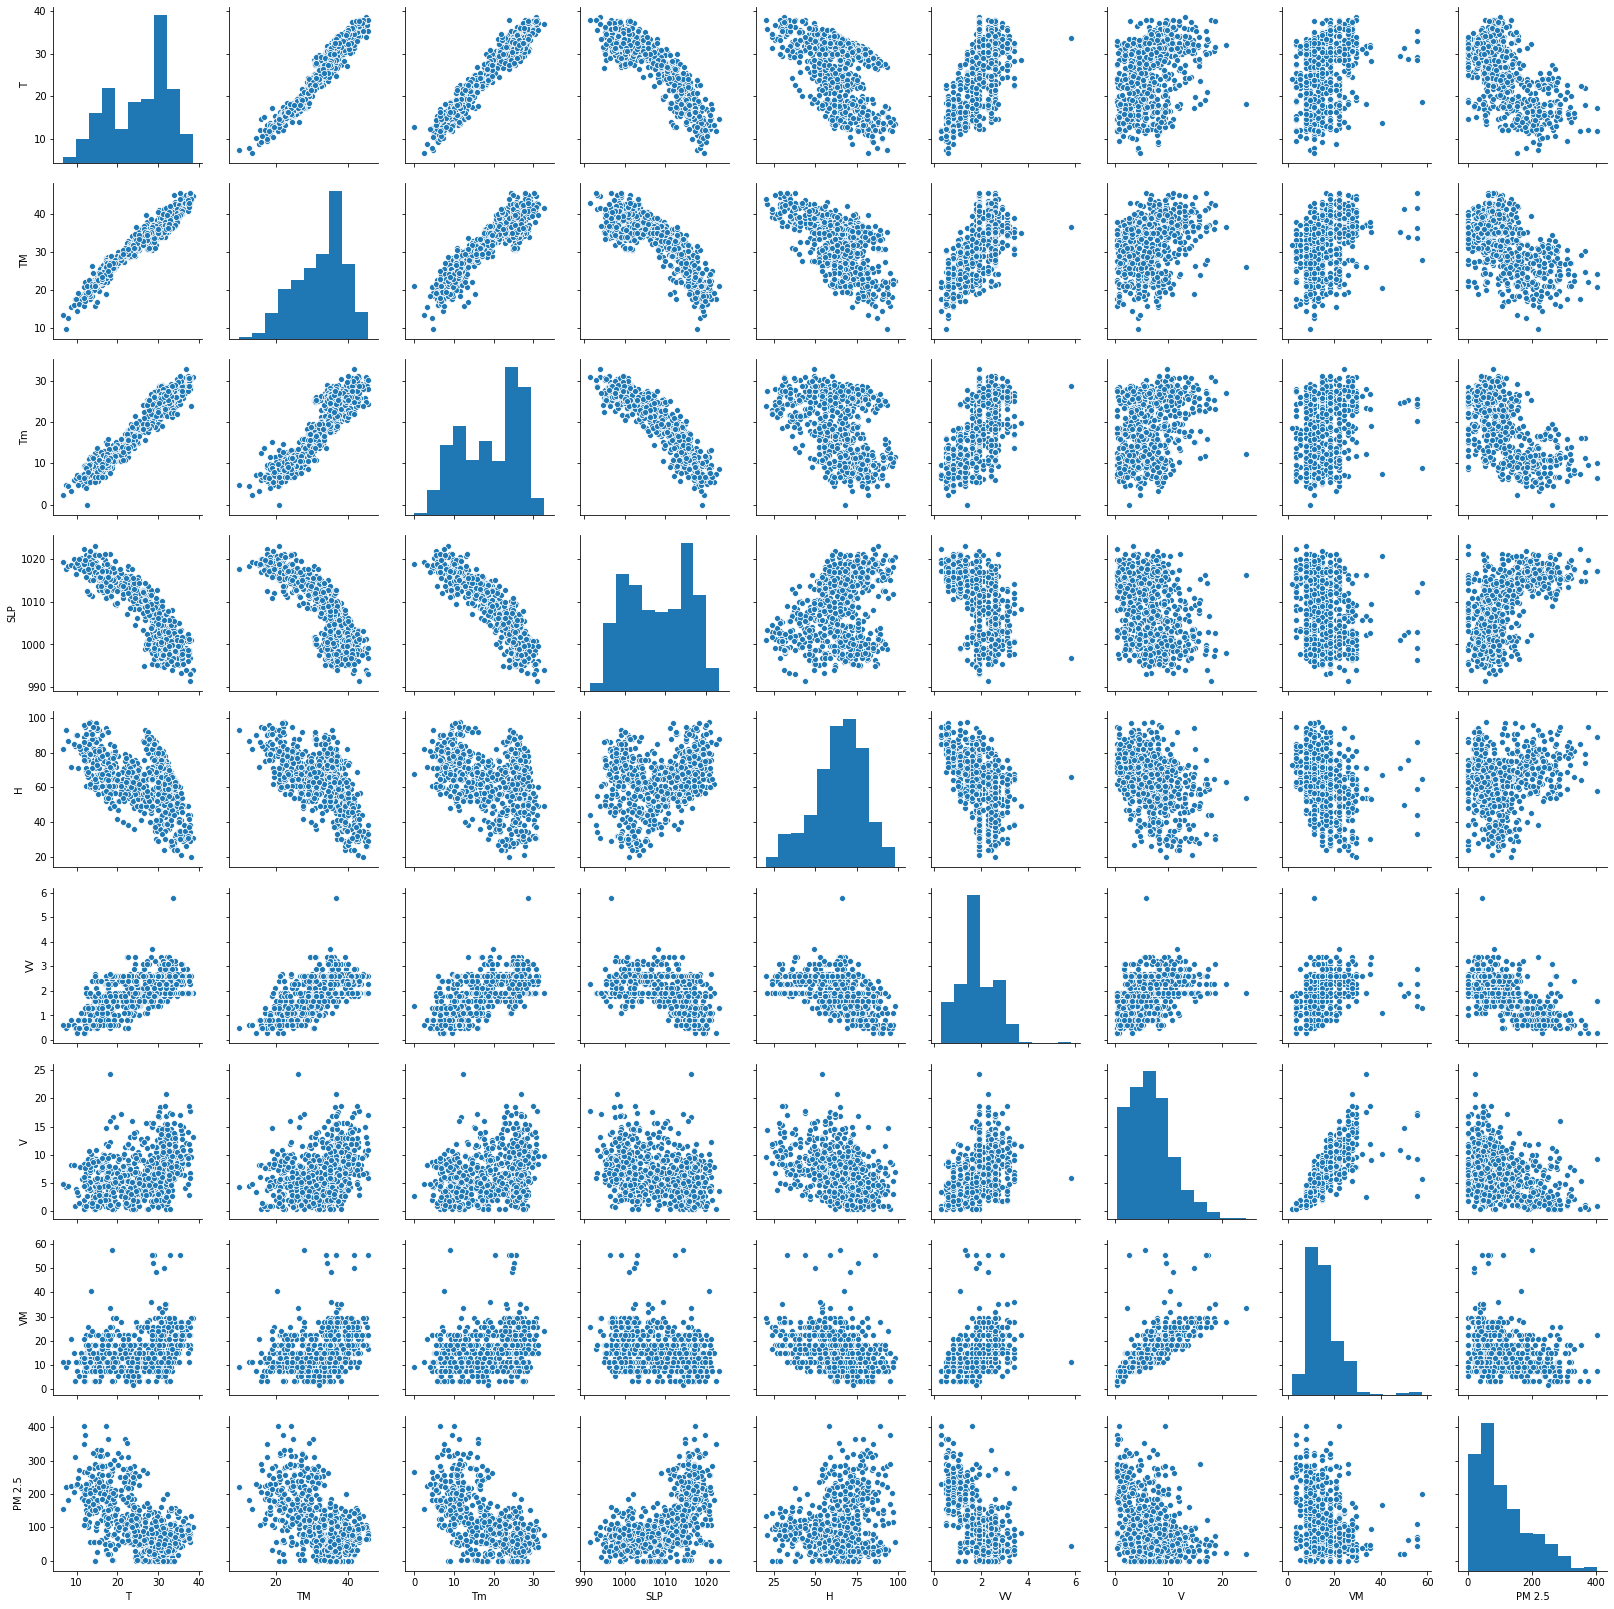

In [4]:
sns.pairplot(df)

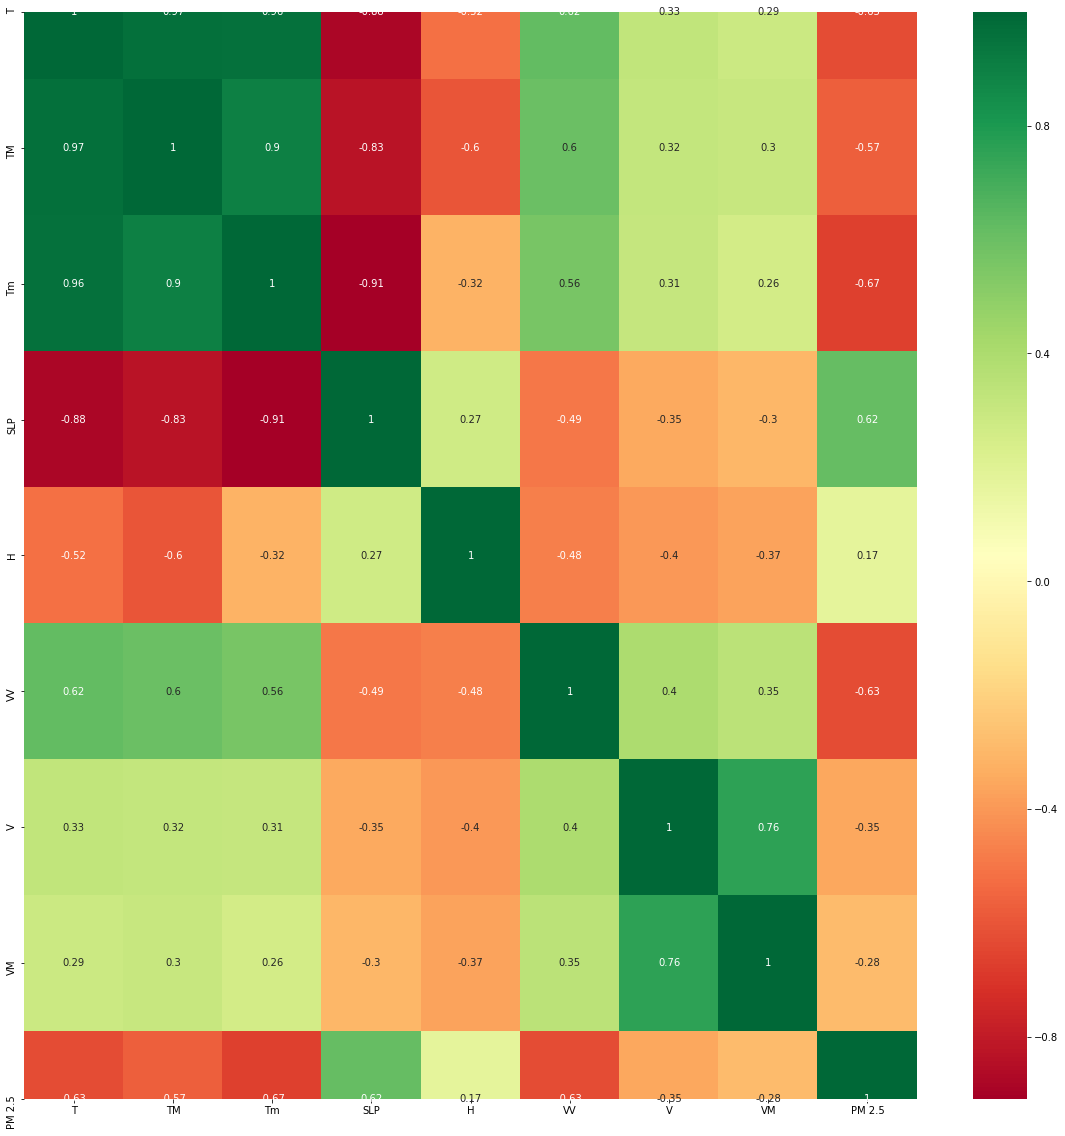

In [5]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

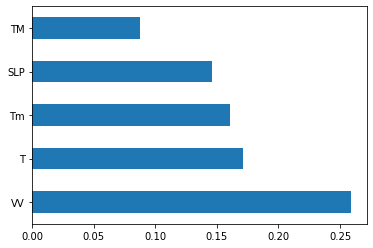

In [8]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

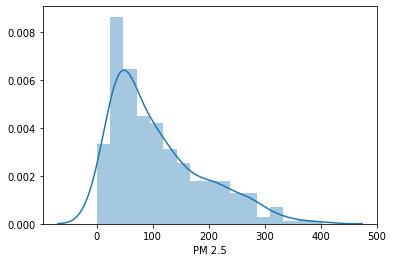

In [9]:
sns.distplot(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [15]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9503350896302806


In [16]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6390180315323698


## Model Evaluation

In [17]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [18]:
score.mean()

0.5008423790736061

In [20]:
prediction=regressor.predict(X_test)

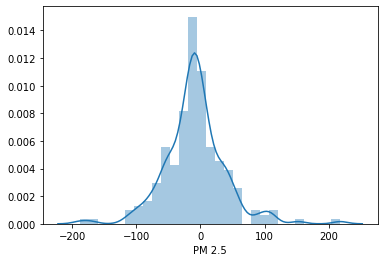

In [21]:
sns.distplot(y_test-prediction)

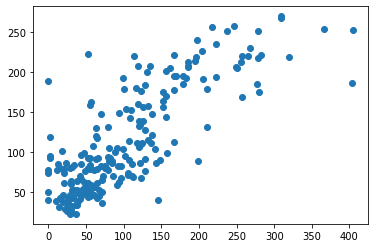

In [22]:
plt.scatter(y_test,prediction)

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34.56692123287671
MSE: 2356.5458231653984
RMSE: 48.54426663536486


In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_sample_split = [1,5,10,15,100]
min_sample_leaf = [1,2,5,10]

param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_sample_split,
    'min_samples_leaf' : min_sample_leaf
}

In [31]:
rf = RandomForestRegressor()
regressor = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring='neg_mean_squared_error', n_iter=100, cv=5, verbose=2, random_state=42 )

In [32]:
regressor.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=100, mi

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=100, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=100, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=100, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=100, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=300, min_samples_split=5, min_samp

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=900, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=900, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=900, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=900, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=900, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=900, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=900, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=900, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=900, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_sampl

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.9s
[CV] n_estimators=1200, min_samples_split=100, min_s

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.7s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.5s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.5s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.5s
[CV] n_estimators=1200, min

[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.2s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.2s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.1s
[CV] n_estimators=900, min_samples_s

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=800, min_samples_sp

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=30 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.8s
[CV] n_estimators=600, min_samples_split=10

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=15 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.0s
[CV] n_estimators=200, min_samples

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=400, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=400, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=400, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=400, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=400, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=400, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=400, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=400, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=400, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=900, min_samples_split=100

[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   0.6s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=1

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.4s
[CV] n_estimators=400, min_samples_split=5, mi

[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=25 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.9s
[CV] n_estimators=500, min_samples_split=100, min_sa

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=30 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=30 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=30 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=30 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=600, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=500, min_samples_split=5, min_sam

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=900, min_samples_split=15,

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.1s
[CV] n_estimators=900, min_samples

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=800, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=800, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=800, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=800, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=10 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.5s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.5s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=25 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=700, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=10, min_sam

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=500, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

[CV]  n_estimators=500, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=700, min_samples_split=10,

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
regressor.best_params_

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [40]:
predict = regressor.predict(X_test)

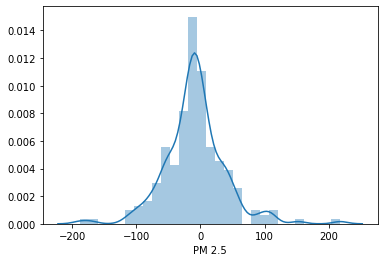

In [36]:
sns.distplot(y_test-prediction)

In [37]:
from sklearn import metrics

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34.56692123287671
MSE: 2356.5458231653984
RMSE: 48.54426663536486


In [ ]:
import pickle
file = open('randomForest_regessor_model.pkl', 'wb')
pickle.dump(random_Search, file)